In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import utils.dataProcessing as dataProcessing
import importlib
importlib.reload(dataProcessing)


## Read Data CSVs

In [65]:
%%capture

family = pd.read_csv("../data/FAMILY_2024-10-29.csv")
start = pd.read_csv("../data/START_2024-10-29.csv");


## Set Up Data for Merging

In [66]:
family = family.rename(columns={"familyidn" : "id"})

shared_columns = dataProcessing.sharedColumns(family, start)
family_subset = family[list(shared_columns)].copy()
start_subset = start[list(shared_columns)].copy()

family_subset.shape

(655, 41)

In [67]:
adjusted_start_subset = dataProcessing.match_data_types(family_subset, start_subset)

Changing agemom: int64 to float64
Changing priordiabp: int64 to float64


## Merge Dataframes

In [72]:
family_start = pd.merge(family_subset, adjusted_start_subset, on = list(shared_columns), how = "outer");
first_column = family_start.pop('id')
family_start.insert(0, 'id', first_column)
family_start.to_csv("../data/adj_family_start.csv", index=False)

In [73]:
# Determine collinearity

correlations = family_start.corr()
correlations

for index, row in correlations.iterrows():
    for col, value in row.items():
        if (index != col) and (value > 0.5):
            print(f"Correlation between {index} and {col}: {value}")

Correlation between c3yDBP and c3ySBP: 0.5508990079802425
Correlation between c1yDBP and c1ySBP: 0.554155000505846
Correlation between gestage and cbthweight: 0.6399899507760788
Correlation between cbthweight and gestage: 0.6399899507760788
Correlation between c3ySBP and c3yDBP: 0.5508990079802425
Correlation between ppbmi and ppwgt: 0.9380760824825061
Correlation between c2ylength and c1ylength: 0.6321368162353526
Correlation between c2ylength and c5yheight: 0.7004967623310943
Correlation between c2ylength and c3yheight: 0.7955210265270133
Correlation between c5yDBP and c5ySBP: 0.5153118121796547
Correlation between c1ybmi and c2ybmi: 0.581285215200468
Correlation between c1ybmi and c3ybmi: 0.5266279671886687
Correlation between c1ybmi and c0_5yBMIAUC: 0.6865936058011933
Correlation between c1ybmi and c0_3yBMIAUC: 0.7429304664015036
Correlation between c2ybmi and c1ybmi: 0.581285215200468
Correlation between c2ybmi and c3ybmi: 0.7435023311358375
Correlation between c2ybmi and c0_5yBMI

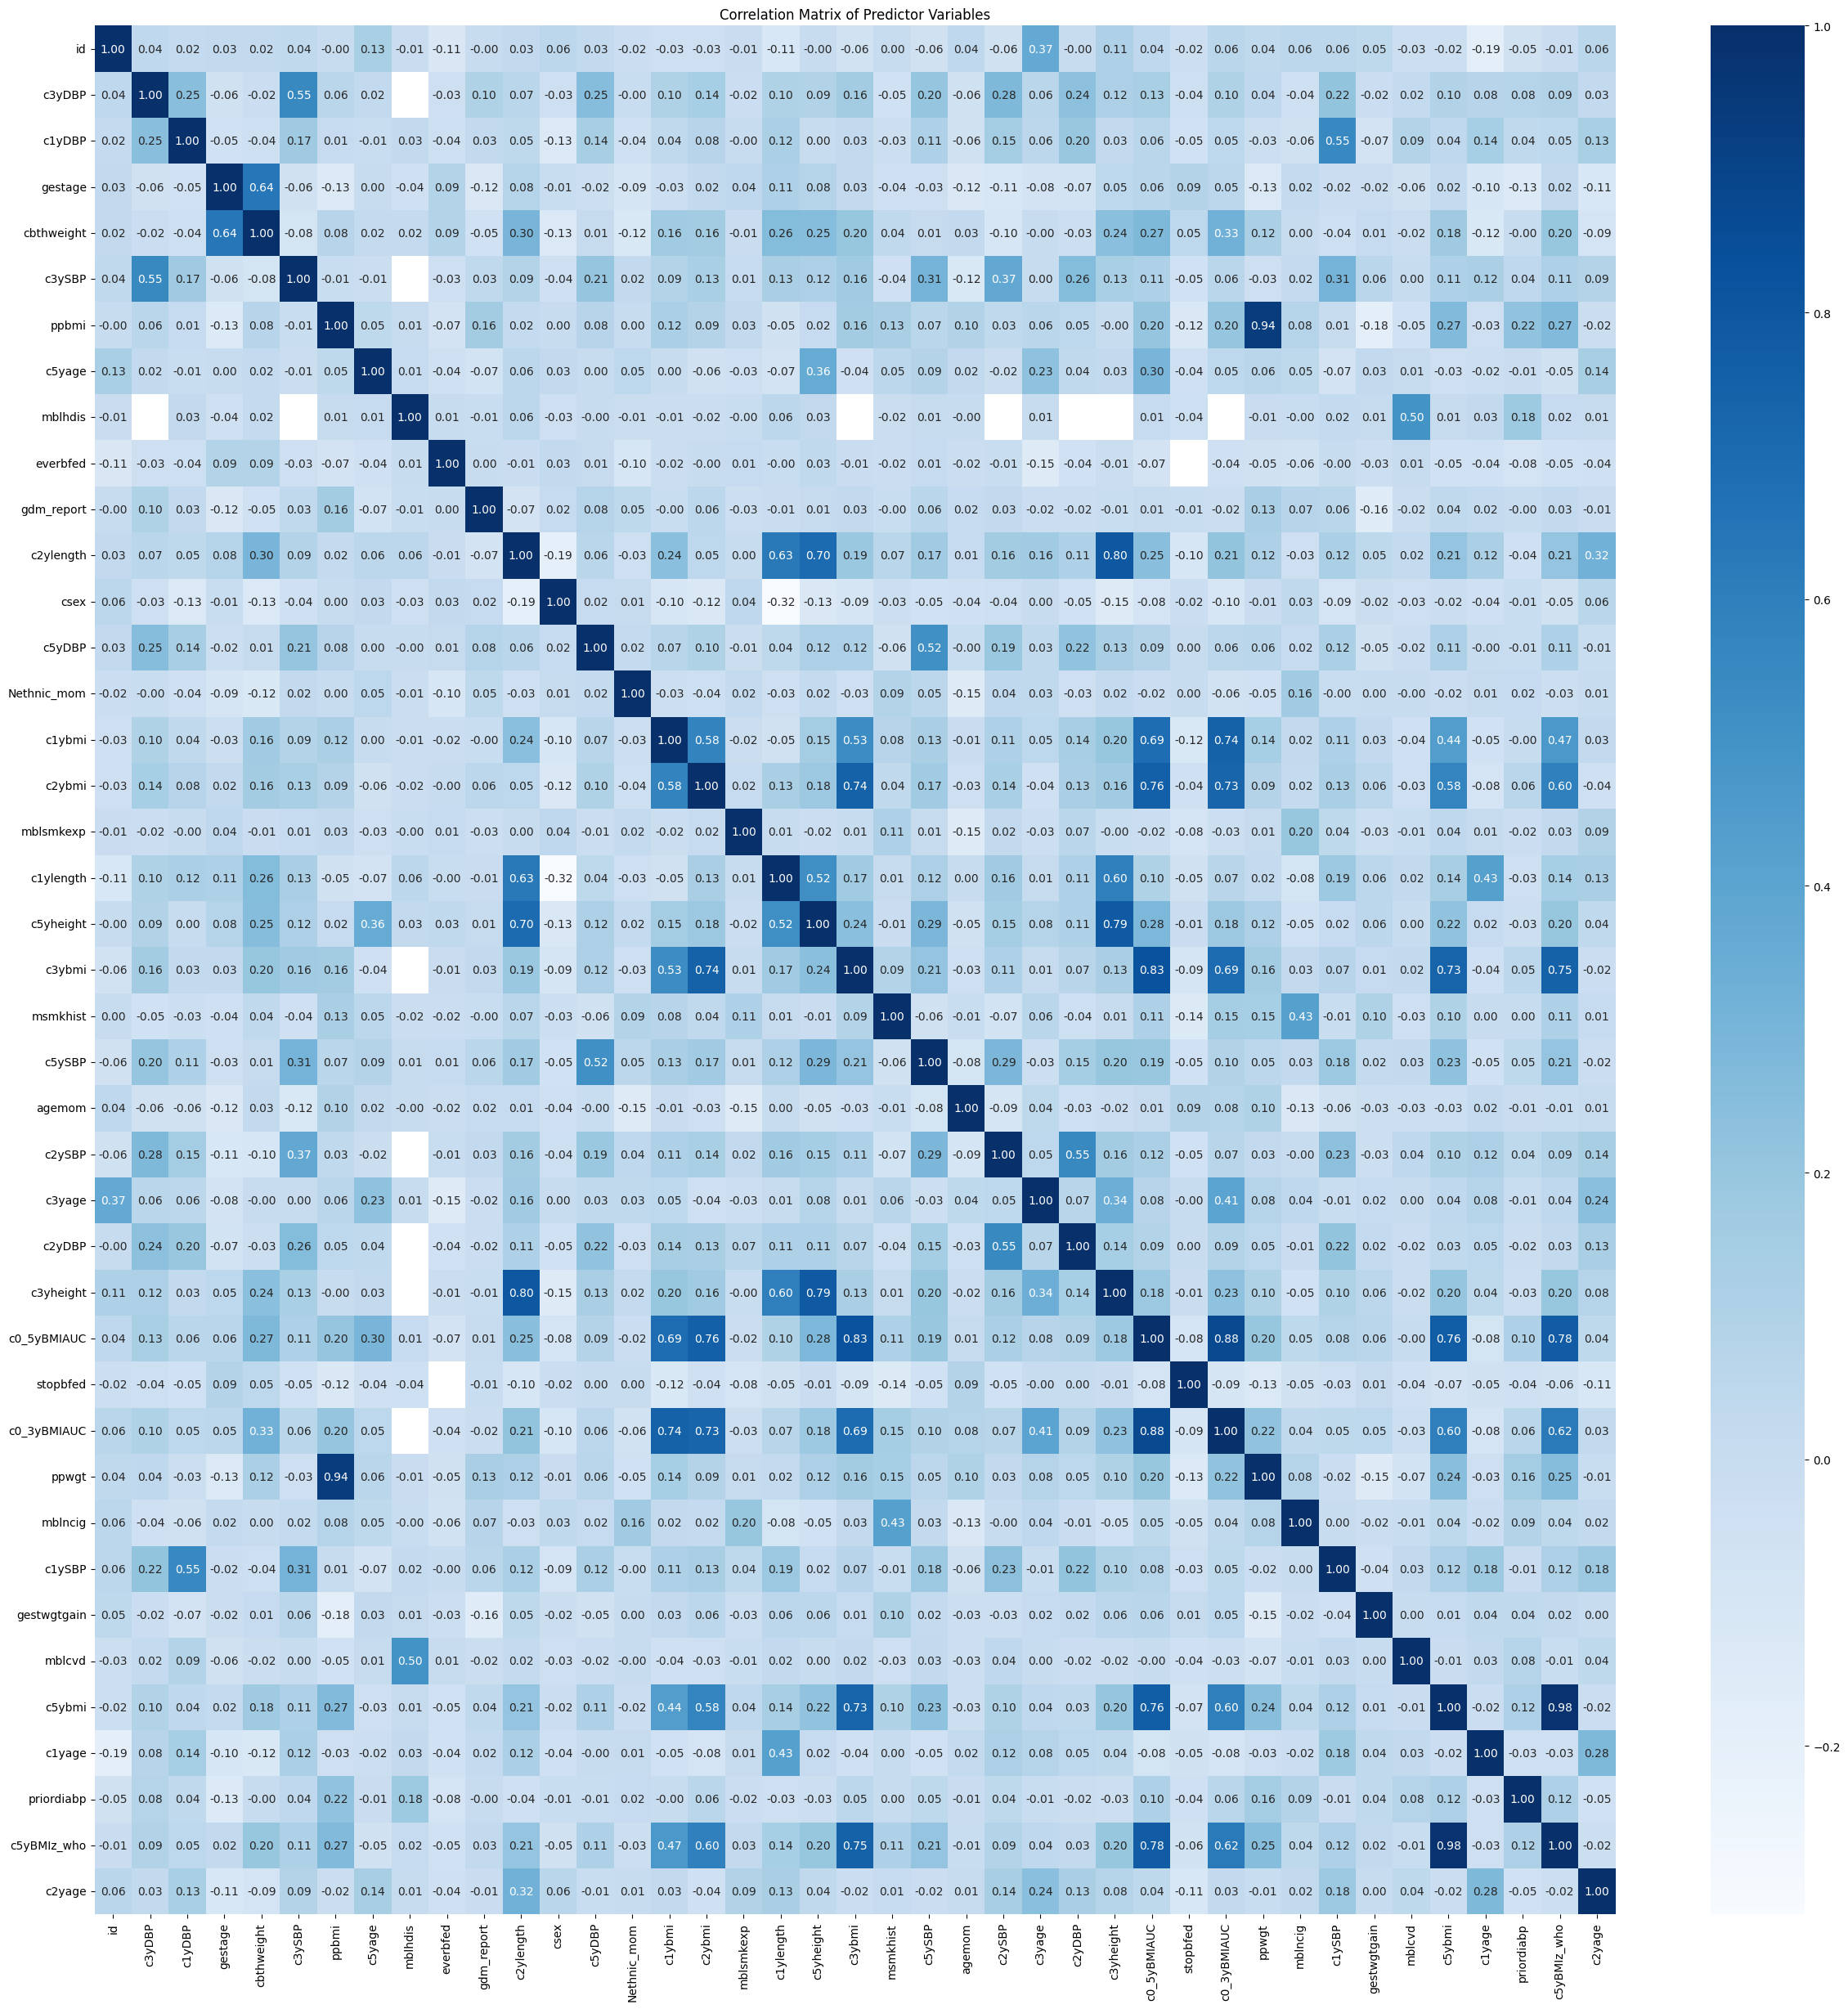

In [70]:
# Correlation matrix

corr_matrix = family_start.corr()

# Plot the heatmap
plt.figure(figsize=(30, 30))
heatMap =  sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Predictor Variables')
plt.show()

In [ ]:
heatMap_fig = heatMap.fig
heatMap_fig.savefig("ALERTBP_heatmap.png")

In [ ]:
current_dir = os.getcwd()
new_dir = os.path.join(current_dir, 'main')
os.chdir(new_dir)